In [1]:
import matplotlib.pyplot as plt
import numpy as np

linspace: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [2]:
data = {
"y" : np.random.normal(loc=10, scale=1, size=100),
"x" : np.linspace(start=0,stop=10, num=100)
}

subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html <br>
figure : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure <br>
plot types: https://matplotlib.org/stable/plot_types/index.html

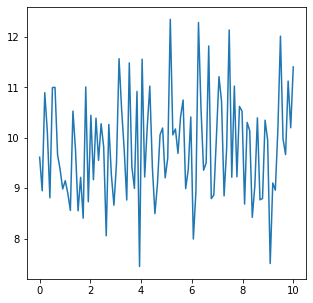

In [25]:
fig, axes = plt.subplots(figsize=(5, 5))
axes.plot(data["x"], data["y"])

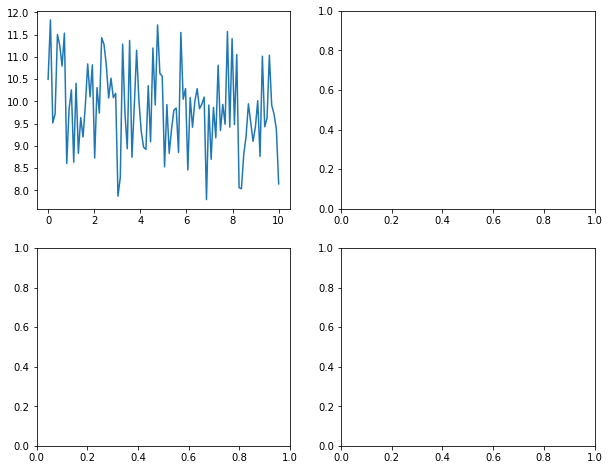

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes[0,0].plot(data["x"], data["y"])

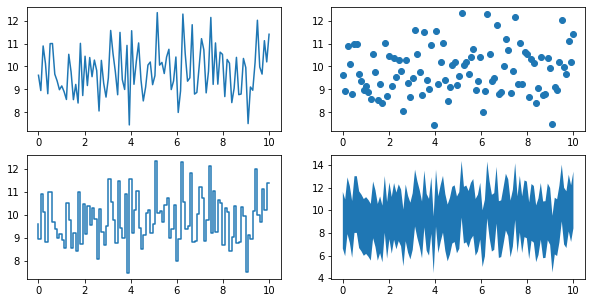

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
axes[0,0].plot(data["x"], data["y"])
axes[0,1].scatter(data["x"], data["y"])
axes[1,0].step(data["x"], data["y"])
axes[1,1].fill_between(data["x"], data["y"]+2, data["y"]-3)

<BarContainer object of 100 artists>

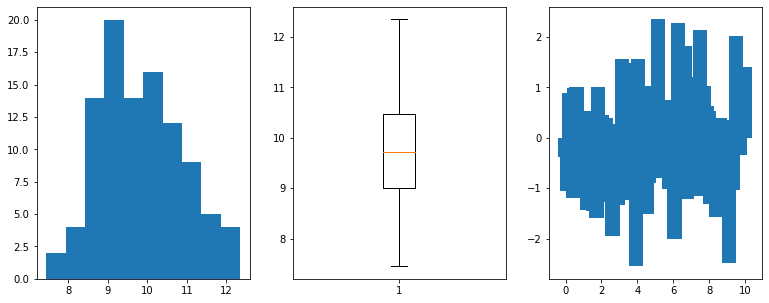

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))
axes[0].hist(data["y"])
axes[1].boxplot(data["y"])
axes[2].bar(data["x"], data["y"]-10)

## Opciones Gráficas 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHuQ4cr-JNEbmeGIGaJE0S-RoKgfqDHplzYu2aInHGgky3pKqKmIOEfpXPb0XF_pq1OBU&usqp=CAU" alt="Drawing" style="width:250px;"/>

In [9]:
import pandas as pd

In [10]:
delitos = pd.read_csv("./Datos/delitos_2019 .csv")

In [11]:
delitos.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123


In [12]:
tipo_delitos_count = delitos.groupby(["tipo_delito"]).count()["id"].sort_values(ascending=False )

C:\Users\sanch\AppData\Local\Temp/ipykernel_13604/1438546800.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(tipo_delitos_count.index, rotation=20,


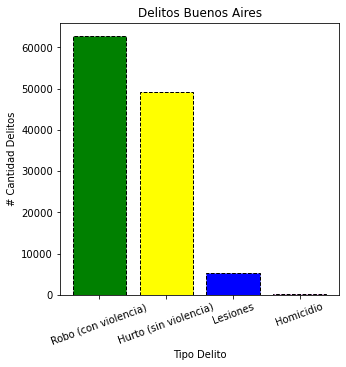

In [18]:
fig, axes = plt.subplots(figsize=(5, 5))
axes.bar(tipo_delitos_count.index, tipo_delitos_count.values, 
        edgecolor="black", linestyle="--",color=["green", "yellow", "blue", "violet"])
axes.set_title('Delitos Buenos Aires', fontdict={"fontsize":12})  
axes.set_xlabel("Tipo Delito")
axes.set_ylabel("# Cantidad Delitos")
axes.set_xticklabels(tipo_delitos_count.index, rotation=20,
                    fontdict={"fontsize":10});

In [22]:
#problema con S/D
delitos.franja_horaria.value_counts()


18     7415
19     7224
20     6990
17     6612
16     6518
14     6458
12     6407
21     6337
15     6315
13     6044
10     5536
11     5527
22     5449
8      5122
9      4931
23     4500
7      3897
0      3073
6      2998
1      2445
5      2357
2      1965
4      1814
3      1719
S/D       8
Name: franja_horaria, dtype: int64

In [23]:
# Transformo a numérico 
delitos_cl = delitos[delitos["franja_horaria"]!="S/D"]
delitos_cl.loc[:,"franja_horaria"] = pd.to_numeric(delitos_cl.franja_horaria,);

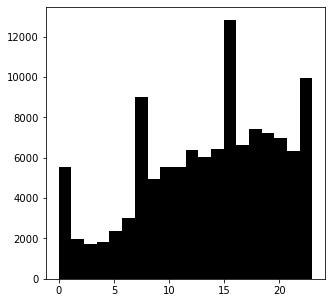

In [25]:
fig, axes = plt.subplots( figsize=(5, 5))
axes.hist(delitos_cl.franja_horaria, bins=20, orientation="vertical", color="black");

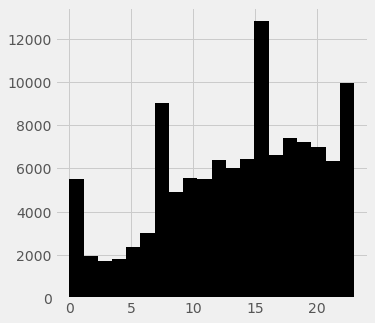

In [132]:
plt.style.use("fivethirtyeight")
fig, axes = plt.subplots( figsize=(5, 5))
axes.hist(delitos_cl.franja_horaria, bins=20, orientation="vertical", color="black");

(0.0, 16000.0)

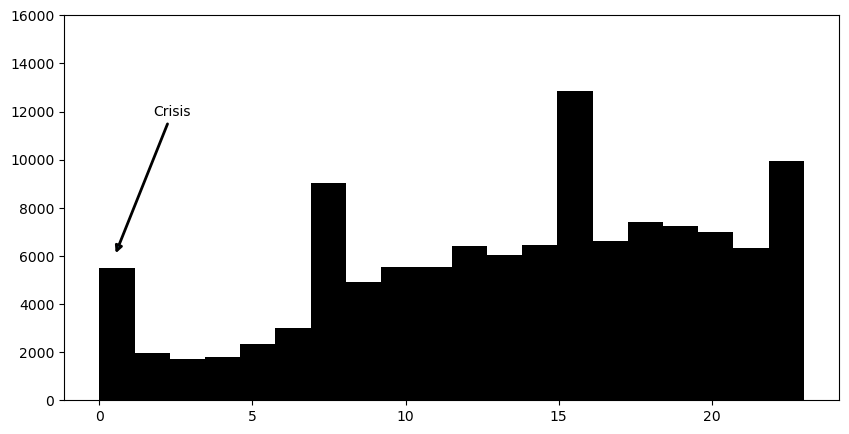

In [27]:
plt.style.use("default")
fig, axes = plt.subplots( figsize=(10, 5))
axes.hist(delitos_cl.franja_horaria, bins=20, orientation="vertical", color="black");
axes.annotate(xy=(0.5,6000), text="Crisis" , va="center",
               xytext=(3, 12000),
            ha="right",arrowprops={"arrowstyle": "-|>", "lw": 2})
plt.ylim(0,16000)